In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

# Question 1

In [ ]:
# 0 - run
# 1 - repair
policy = np.zeros(10, dtype = 'int')
policy[5] = 1
policy

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
state_space = [0, 1, 2, 3]
run_tpm = [[0.7, 0.3, 0, 0], 
           [0, 0.5, 0.5, 0], 
           [0, 0, 0.2, 0.8], 
           [0, 0, 0, 1]]
repair_tpm = [[1, 0, 0, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 0]]
initial_state = 0
time = 10 #10 days

In [ ]:
def mean(state):
  return 3 - state

In [ ]:
def markov_chain(initial_state, policy):
  rewards = []
  trajectory = []

  state = initial_state
  for t in range(time):
    action = policy[t]
    mean_of_exp = mean(state)
    
    if action == 0:
      print("action is 0 i.e run")
      next_state = np.random.choice(state_space, p = run_tpm[state])
      reward = np.random.exponential(mean_of_exp)
    elif action ==1:
      print("action is 1 i.e repair")
      next_state = np.random.choice(state_space, p = repair_tpm[state])
      reward = -100

    rewards.append(reward)
    trajectory.append(state)

    state = next_state
  
  return rewards, trajectory

In [ ]:
rewards, trajectory = markov_chain(initial_state, policy)

action is 0 i.e run
action is 0 i.e run
action is 0 i.e run
action is 0 i.e run
action is 0 i.e run
action is 1 i.e repair
action is 0 i.e run
action is 0 i.e run
action is 0 i.e run
action is 0 i.e run


In [ ]:
trajectory

[0, 0, 1, 1, 2, 2, 0, 0, 0, 0]

# Question 2

In [ ]:
def policy2(state):
  if isinstance(state, int) == 0:
    print("Not an integer input for policy")
    return 
  if state == 3:
    return 1
  else:
    return 0

In [ ]:
def markov_chain2(initial_state):
  rewards = []
  trajectory = []
  actions = []
  state = initial_state
  for t in range(time):
    action = policy2(state)
    mean_of_exp = mean(state)
    
    actions.append(action)
    if action == 0:
      # print("action is 0 i.e run")
      next_state = np.random.choice(state_space, p = run_tpm[state])
      reward = np.random.exponential(mean_of_exp)
    elif action ==1:
      # print("action is 1 i.e repair")
      next_state = np.random.choice(state_space, p = repair_tpm[state])
      reward = -100

    rewards.append(reward)
    trajectory.append(state)

    state = int(next_state)
    # print(state)
  
  return actions, rewards, trajectory

In [ ]:
actions2, rewards2, trajectory2 = markov_chain2(initial_state)

In [ ]:
actions2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
trajectory2 

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3]

# Question 3

In [ ]:
rewards_collection = []
trajectory_collection = []
actions_collection =[]
for t in range(1000):
  actions3, rewards3, trajectory3 = markov_chain2(initial_state)
  rewards_collection.append(rewards3)
  trajectory_collection.append(trajectory3)
  actions_collection.append(actions3)

In [ ]:
rewards_collection = np.array(rewards_collection)
rewards_collection.shape

(1000, 10)

In [ ]:
trajectory_collection = np.array(trajectory_collection)
trajectory_collection.shape

(1000, 10)

In [ ]:
actions_collection = np.array(actions_collection)
actions_collection.shape

(1000, 10)

## 3 A

In [ ]:
import random

In [ ]:
trajectory_collection[:10, :]

array([[0, 1, 2, 2, 3, 0, 0, 1, 2, 3],
       [0, 0, 0, 1, 1, 2, 3, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 1, 2, 3, 0, 0],
       [0, 0, 0, 1, 2, 3, 0, 1, 1, 2],
       [0, 0, 1, 2, 3, 0, 1, 2, 3, 0],
       [0, 1, 1, 2, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 3, 0, 0]])

In [ ]:
def calc_ni_ntotal_in_single_run(i, j, act, traj):

  run_ind = []
  rep_ind = []
  for iterator in range(10):
    if act[iterator] == 0:
      run_ind.append(iterator)
    elif act[iterator] == 1:
      rep_ind.append(iterator)
  run_ind, rep_ind

  run = True
  if i == 3:
    run = False
  
  if run == True:
    arr = run_ind
    # print("run indexes", run_ind)
  else:
    arr = rep_ind
    # print("rep indexes", rep_ind)
  

  n_i_to_j = 0
  n_i = 0
  for iter in range(10):
    if iter == 9:
      continue
    if iter in arr:
      # print("iter in run", traj[iter], traj[iter+1])
      if int(traj[iter]) == i:
        # print("traj[iter]) == i")
        if int(traj[iter+1]) == j:
          # print("(traj[iter+1]) == j")
          n_i_to_j += 1
          n_i += 1
          # print(n_i_to_j, n_i)
        if int(traj[iter+1]) !=j:
          # print("second if", traj[iter], traj[iter+1])
          n_i += 1
    # else:
    #   print(f"{iter} not in array")
    
  return n_i, n_i_to_j

In [ ]:
index = random.randint(0, 999)
n_i, n_i_to_j = calc_ni_ntotal_in_single_run(3, 0, actions_collection[index],  trajectory_collection[index])
n_i_to_j, n_i

(2, 2)

In [ ]:
actions_collection[index],  trajectory_collection[index]

(array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0]), array([0, 1, 2, 3, 0, 0, 1, 2, 3, 0]))

In [ ]:
act = actions_collection[0]
traj = trajectory_collection[0]
n_i, n_i_to_j = calc_ni_ntotal_in_single_run(0, 0, act, traj)
n_i_to_j/n_i

0.3333333333333333

In [ ]:
act, traj

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1]), array([0, 1, 2, 2, 3, 0, 0, 1, 2, 3]))

In [ ]:
def calc_ni_ntotal_in_all_runs(i, j):
  n_i_total = 0
  n_i_to_j_total  =0
  for iter in range(1000):
    act = actions_collection[iter]
    traj = trajectory_collection[iter]
    n_i, n_i_to_j = calc_ni_ntotal_in_single_run(i, j, act, traj)
    
    n_i_total += n_i
    n_i_to_j_total += n_i_to_j

  return n_i_total, n_i_to_j_total

In [ ]:
x, y = calc_ni_ntotal_in_all_runs(3, 3)
y, x

(0, 839)

In [ ]:
x, y = calc_ni_ntotal_in_all_runs(0, 1)
y/x

0.2986289631533848

In [ ]:
tpm_from_thousand_runs = np.zeros((4, 4))

for i in range(4):
  for j in range(4):
    n_i_total, n_i_to_j_total = calc_ni_ntotal_in_all_runs(i, j)
    # print(n_i_total, n_i_to_j_total)
    if n_i_to_j_total == 0:
      p = 0
    else:
      p = n_i_to_j_total/n_i_total
    tpm_from_thousand_runs[i][j] = p

In [ ]:
tpm_from_thousand_runs

array([[0.70137104, 0.29862896, 0.        , 0.        ],
       [0.        , 0.49869338, 0.50130662, 0.        ],
       [0.        , 0.        , 0.19548872, 0.80451128],
       [1.        , 0.        , 0.        , 0.        ]])

## 3 B

In [ ]:
rewards_collection[:2]

array([[ 2.43687724e+00,  4.09148230e+00,  1.63439112e+00,
         2.05653065e+00, -1.00000000e+02,  3.62996698e+00,
         7.97609800e-01,  1.79355570e+00,  1.26820544e+00,
        -1.00000000e+02],
       [ 5.21517327e-02,  2.00867051e+00,  4.65383542e+00,
         2.01334816e-01,  1.75886343e+00,  8.01216938e-01,
        -1.00000000e+02,  2.80312449e+00,  8.72939508e-02,
         9.61183294e-01]])

In [ ]:
trajectory_collection[:2]

array([[0, 1, 2, 2, 3, 0, 0, 1, 2, 3],
       [0, 0, 0, 1, 1, 2, 3, 0, 0, 1]])

In [ ]:
rewards_dist0 = []
rewards_dist1 = []
rewards_dist2 = []

for i in range(1000):
  traj =  trajectory_collection[i]
  rew = rewards_collection[i]
  for j in range(10):
    if traj[j] == 0:
      rewards_dist0.append(rew[j])
    if traj[j] == 1:
      rewards_dist1.append(rew[j])
    if traj[j] == 2:
      rewards_dist2.append(rew[j])

In [ ]:
import matplotlib.pyplot as plt

2.930375392215095


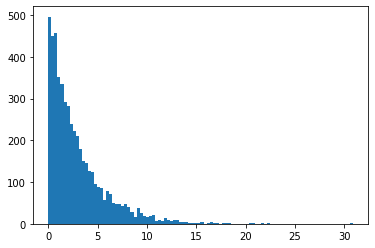

In [ ]:
plt.hist(rewards_dist0, bins = 100);
print(np.mean(rewards_dist0))

2.006518548842103


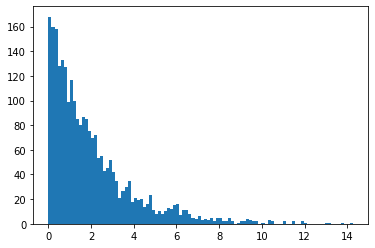

In [ ]:
plt.hist(rewards_dist1, bins = 100);
print(np.mean(rewards_dist1))

1.0256648263714414


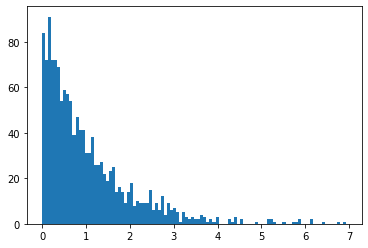

In [ ]:
plt.hist(rewards_dist2, bins = 100);
print(np.mean(rewards_dist2))

# Question 4

In [ ]:
# tpm
# each possible action 
# reward distr given for each state

In [ ]:
def markov_general(initial_state, tpms, actions, rewards,policy, time):
  no_actions = len(actions)
  tpm = [] #list containing all tpms
  for i in range(no_actions):
    tpm.append(tpms[i])

  actions_taken, rewards_gained, trajectory = markov_chain_general(initial_state, tpm, actions, rewards, policy, time)
  return actions_taken, rewards_gained, trajectory

In [ ]:
def markov_chain_general(initial_state, tpm, actions, reward_distributions, policy, time):
  rewards = []
  trajectory = []
  actions_taken = []
  state = initial_state
  for t in range(time):
    action = policy(state)
    actions_taken.append(action)

    
    tpm_for_action = tpm[action]
    next_state = np.random.choice(state_space, p = tpm_for_action[state])

    reward = reward_distributions(state)
    rewards.append(reward)

    trajectory.append(state)

    state = int(next_state)
    # print(state)
  
  return actions_taken, rewards, trajectory

In [ ]:
def policy4(state):
  if isinstance(state, int) == 0:
    print("Not an integer input for policy")
    return 
  if state == 3:
    return 1
  else:
    return 0

action_space = [0, 1]

tpm = [run_tpm, repair_tpm]

initial_state = 0

def rewards4(state):
  if isinstance(state, int) == 0:
    print("Not an integer input for policy")
    return 
  if state == 3:
    return -100
  else:
    return np.random.exponential(scale = 3 - state)

In [ ]:
actions_taken, rewards_gained, trajectory4 =markov_general(initial_state, np.array(tpm), action_space, rewards4,policy4, 10)

In [ ]:
actions_taken

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
trajectory4

[0, 1, 1, 1, 1, 2, 3, 0, 0, 1]